In [12]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
import warnings
warnings.filterwarnings('ignore')

In [15]:
import numpy as np
x = 2*np.random.rand(100,1)
y = 4+3*x+np.random.randn(100,1)

(0.0, 2.0, 0.0, 15.0)

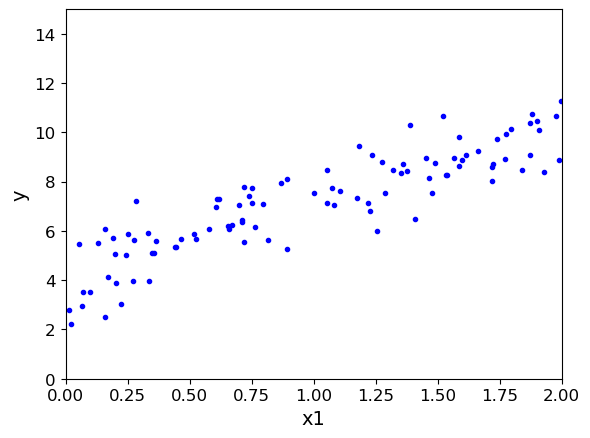

In [17]:
plt.plot(x,y,'b.')
plt.xlabel('x1')
plt.ylabel('y')
plt.axis([0,2,0,15])

In [21]:
x_b = np.c_[np.ones((100,1)),x]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta_best

array([[4.17844564],
       [3.02398507]])

In [26]:
x_new = np.array([[0],[2]])
x_new_ = np.c_[np.ones((2,1)),x_new]
x_pre = x_new_.dot(theta_best)
x_pre

array([[ 4.17844564],
       [10.22641579]])

(0.0, 2.0, 0.0, 15.0)

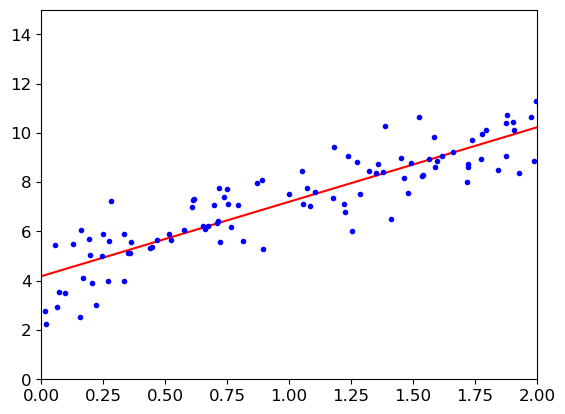

In [28]:
plt.plot(x_new,x_pre,'r-')
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
print(lin_reg.coef_,lin_reg.intercept_)

[[3.02398507]] [4.17844564]


In [34]:
eta = 0.1
n_iteration = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iteration):
    gradients = 2/m*x_b.T.dot(x_b.dot(theta)-y)
    theta = theta-eta*gradients
theta

array([[4.17844564],
       [3.02398507]])

In [36]:
x_new_.dot(theta)

array([[ 4.17844564],
       [10.22641579]])

In [49]:
theta_ =[]
def plot_gra_des(theta,eta,theta_path=None):
    m = len(x_b)
    plt.plot(x,y,'b.')
    n_iteration = 1000
    for iteration in range(n_iteration):
        y_predict = x_new_.dot(theta)
        plt.plot(x_new,y_predict,'b-')
        gradients = 2/m*x_b.T.dot(x_b.dot(theta)-y)
        theta = theta-eta*gradients
        if theta_path is not None:
            theta_.append(theta)
    plt.xlabel("x-1")
    plt.axis([0,2,0,15])
    plt.title("eta = {}".format(eta))
    

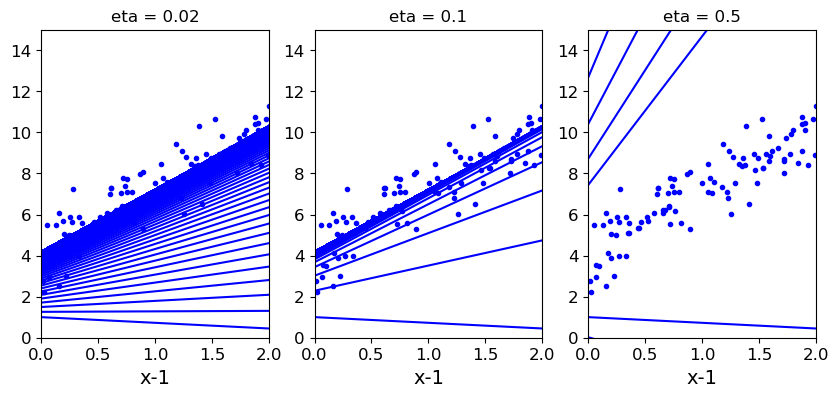

In [52]:
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131)
plot_gra_des(theta,eta = 0.02)
plt.subplot(132)
plot_gra_des(theta,eta = 0.1)
plt.subplot(133)
plot_gra_des(theta,eta = 0.5)
